In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import requests

from pathlib import Path
from PIL import Image
from io import BytesIO

In [2]:
!pwd
ROOT_DIR = Path(os.path.abspath(os.getcwd())).parent
YOLO_DIR = f'{ROOT_DIR}/yolov7'
os.chdir(YOLO_DIR)
print(os.getcwd())
# 1. Install dependencies
# !git clone https://github.com/WongKinYiu/yolov7

# !cd yolov7 & pip install -r requirements.txt --upgrade --user

# !wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

/c/Users/emuli/Projects/NostaleBots/notebooks
C:\Users\emuli\Projects\NostaleBots\yolov7


In [3]:
from hubconf import custom

In [4]:
# model = torch.hub.load('yolov7', 'hyp.scratch.tiny.yaml', source='local')
model = custom(path_or_model='../yolov7.pt')


                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 1]                 
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  8                -1  1     36992  

 76                -1  1         0  models.common.MP                        []                            
 77                -1  1     16640  models.common.Conv                      [128, 128, 1, 1]              
 78                -3  1     16640  models.common.Conv                      [128, 128, 1, 1]              
 79                -1  1    147712  models.common.Conv                      [128, 128, 3, 2]              
 80      [-1, -3, 63]  1         0  models.common.Concat                    [1]                           
 81                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 82                -2  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 83                -1  1    295168  models.common.Conv                      [256, 128, 3, 1]              
 84                -1  1    147712  models.common.Conv                      [128, 128, 3, 1]              
 85                -1  1    147712  m

Adding autoShape... 


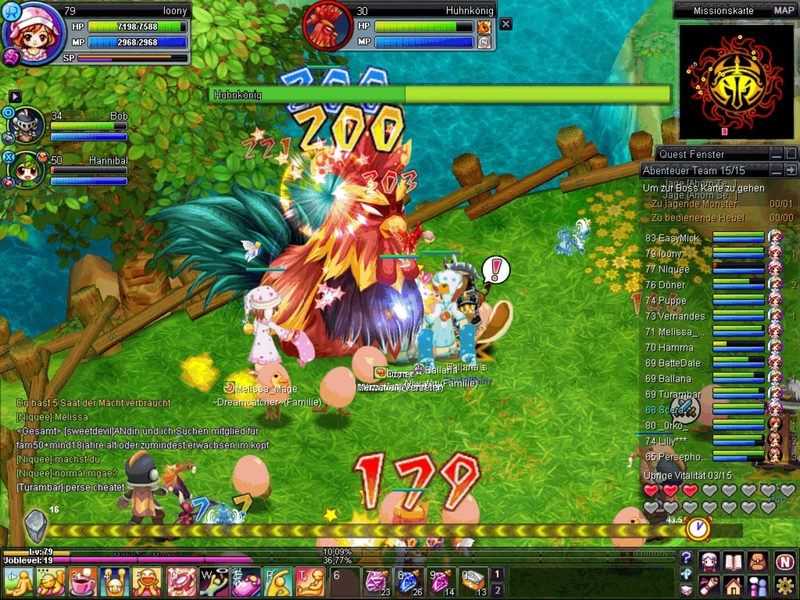

In [12]:
# load image
image_url = "https://static.wikia.nocookie.net/nostale/images/5/5e/Mmorpg-fantasy-nostale-screenshot3.jpg/revision/latest?cb=20100411054850"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
img

In [13]:
# detection
result = model(np.array(img))

In [19]:
result

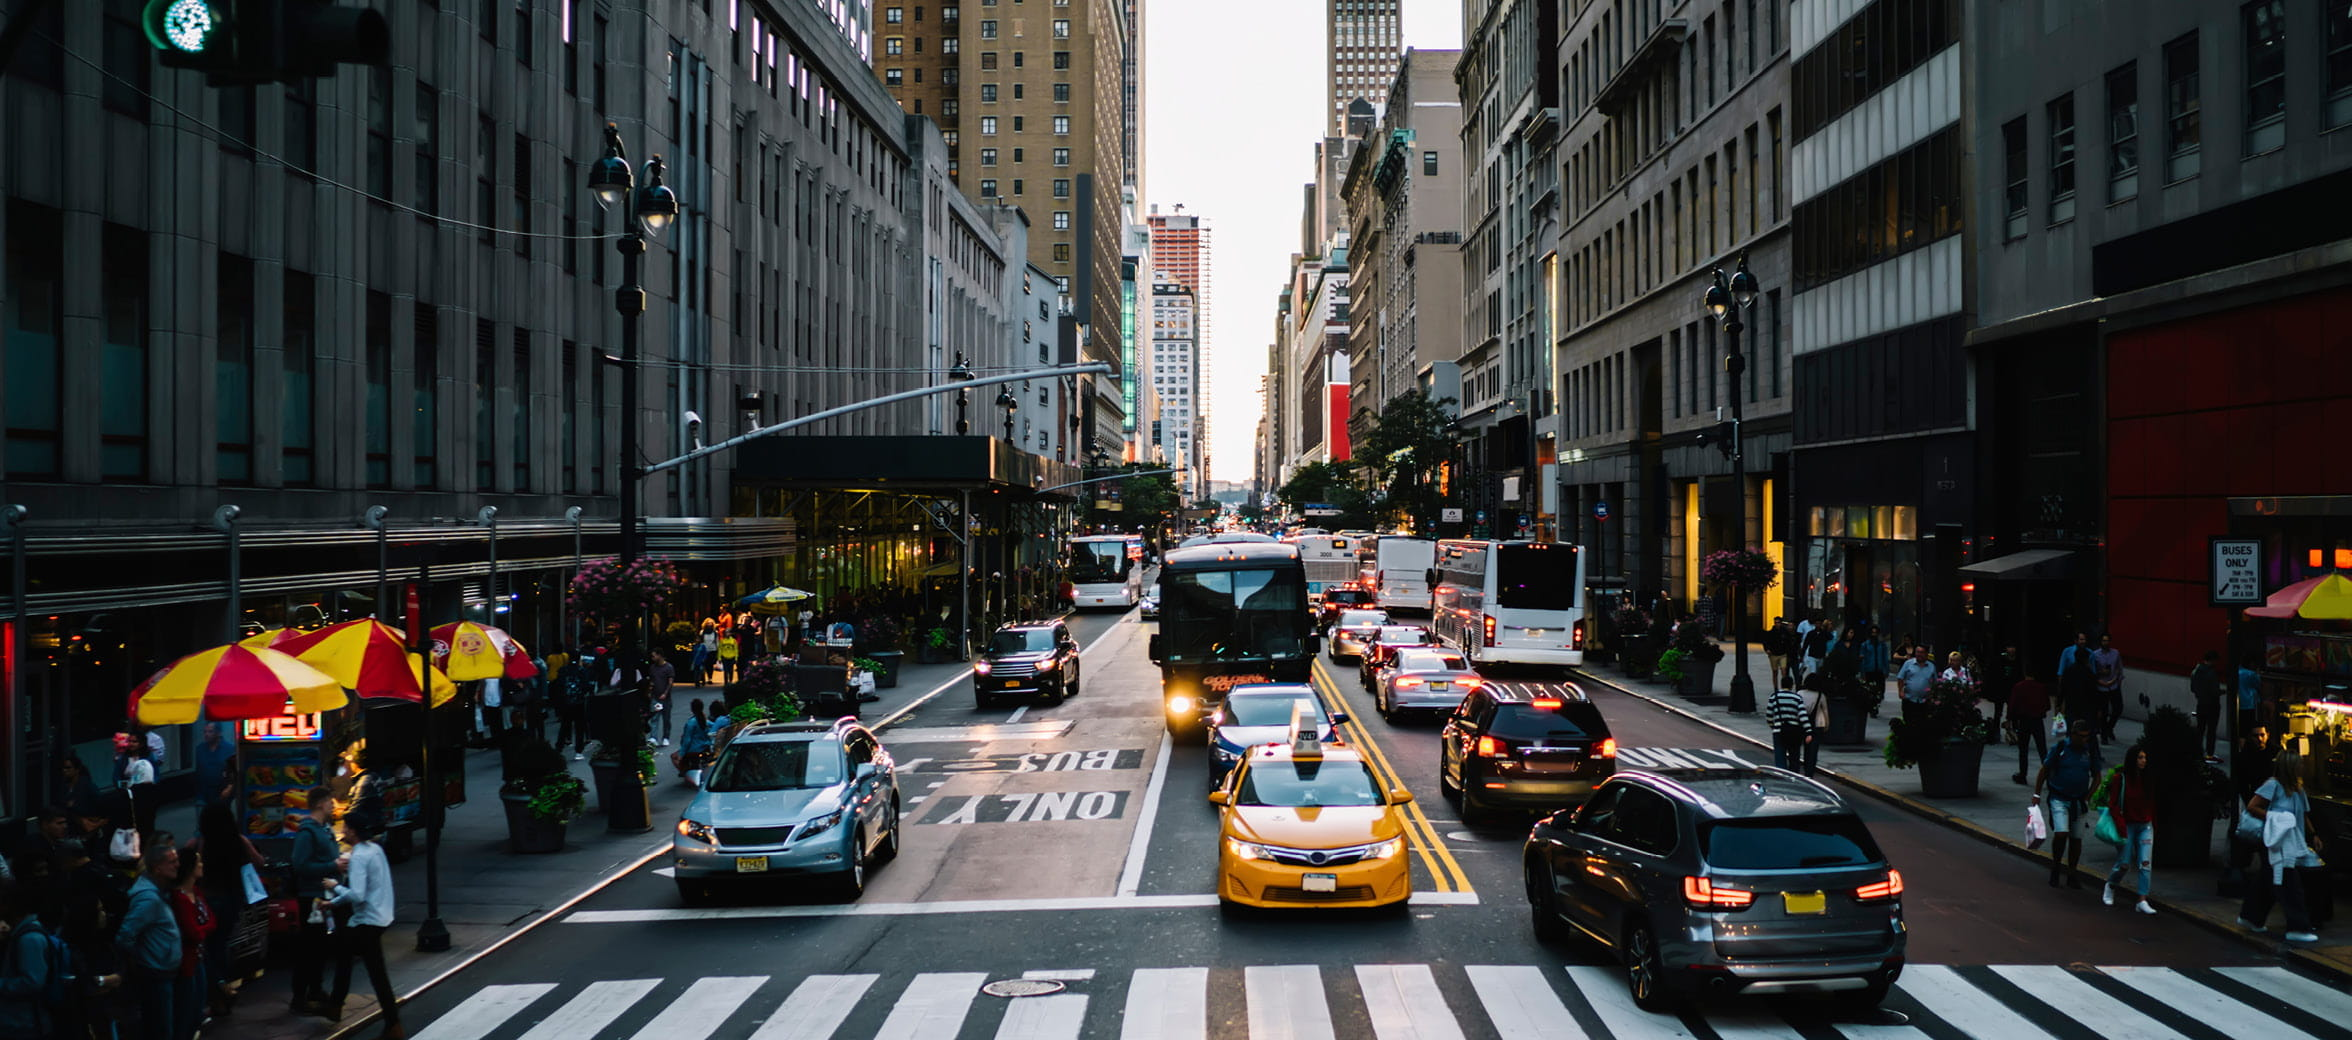

In [27]:
img_path = 'C:/Users/emuli/Downloads/main-streets-2022-hero.jpg'
img = Image.open(img_path)
img

In [26]:
!python detect.py --weights C:/Users/emuli/Projects/NostaleBots/yolov7.pt --conf 0.20 --source C:/Users/emuli/Downloads/main-streets-2022-hero.jpg

Namespace(weights=['C:/Users/emuli/Projects/NostaleBots/yolov7.pt'], source='C:/Users/emuli/Downloads/main-streets-2022-hero.jpg', img_size=640, conf_thres=0.2, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

22 persons, 9 cars, 4 buss, 3 trucks, 4 traffic lights, 6 umbrellas, 2 handbags, 1 chair, 5 potted plants, Done. (603.3ms) Inference, (0.0ms) NMS
 The image with the result is saved in: runs\detect\exp2\main-streets-2022-hero.jpg
Done. (0.704s)


YOLOR  v0.1-121-g2fdc7f1 torch 1.13.1+cpu CPU

Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
C:\Users\emuli\AppData\Roaming\Python\Python39\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


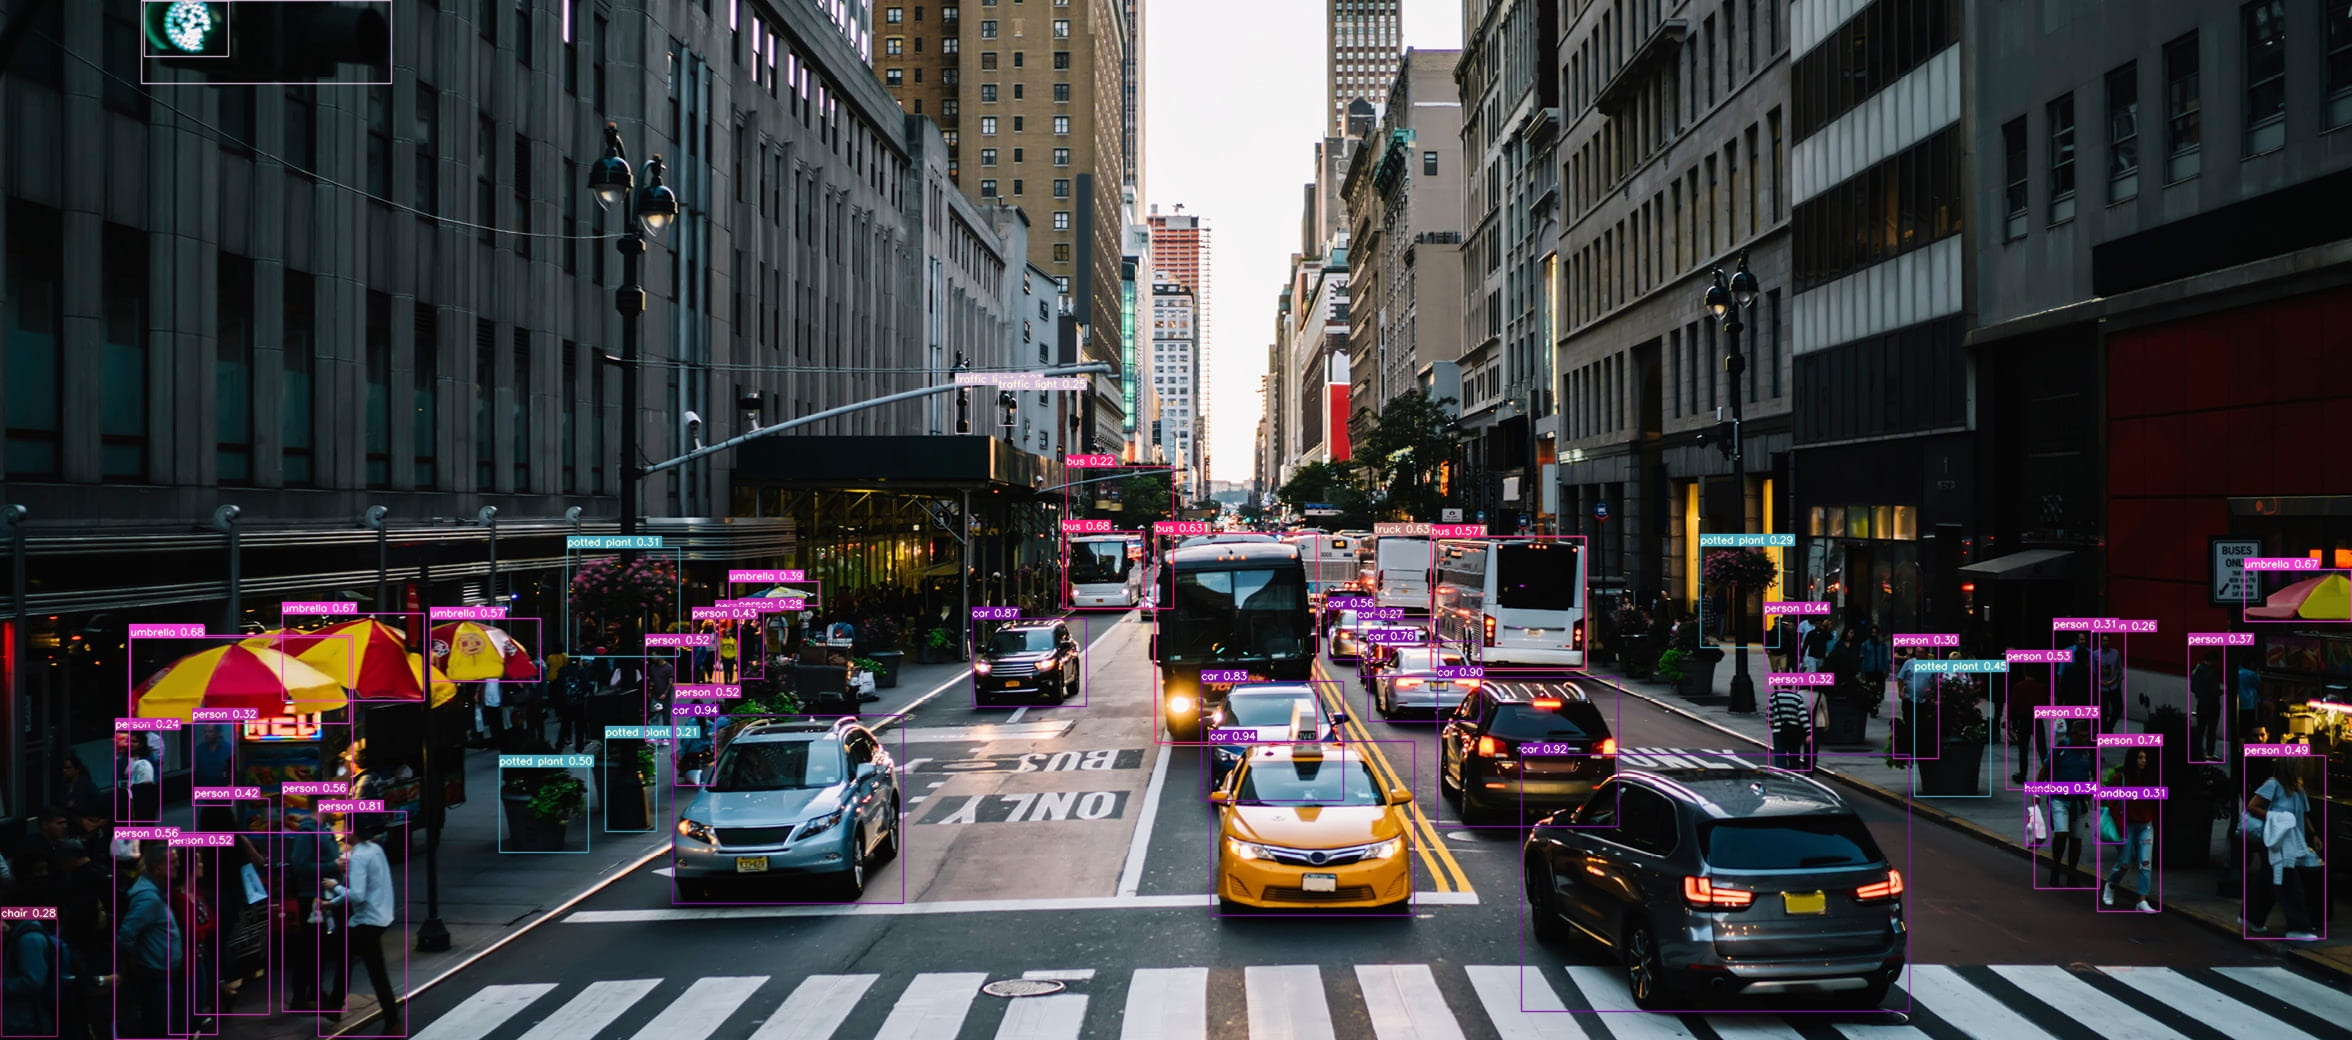

In [28]:
# view image saved in yolov7/runs/exp/...
new_img_path = '../yolov7/runs/detect/exp2/main-streets-2022-hero.jpg'
new_img = Image.open(new_img_path)
new_img